# Discrete

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binom, bernoulli, multinomial, poisson
import numpy as np

## Binomial

Toss a coint $n$ times with $k$ times success, probability of head is $\theta$, $X \in \{0, ..., n\}$.

- **PMF**
$$Bin(k|n, \theta) = {{n}\choose{k}}\theta^k (1 - \theta)^{n - k}$$

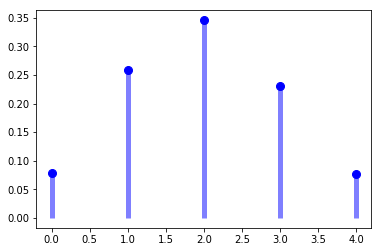

In [2]:
# setup experiment
n = 5
theta = 0.4
k = x = np.arange(binom.ppf(0.01, n, theta), binom.ppf(0.99, n, theta))
y = binom.pmf(k, n, theta)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', ms=8, label='binom pmf')
ax.vlines(x, ymin=0, ymax=y, colors='b', lw=5, alpha=0.5)

## Bernouli

Toss a coin only once $X \in \{0, 1\}$.

- **PMF**
$$Ber(x | \theta) = \theta^{\mathbf{I}(x = 1)} (1 - \theta)^{\mathbf{I}(x = 0)}$$

- **Likelihood**
$$L(p) = log(p) = klog(\theta) + (n - k)log(1 - \theta)$$

- **MLE**
$$\frac{d L(p)}{d \theta} = 0 \iff k\frac{1}{\theta} - (n - k)\frac{1}{1 - \theta} = 0$$
$$\theta_{MLE} = \frac{k}{n}$$

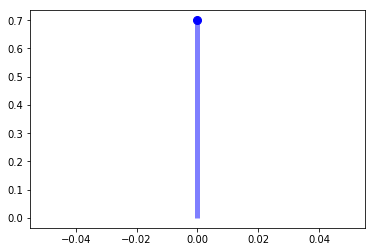

In [3]:
# setup experiment
theta = 0.3
k = x = np.arange(bernoulli.ppf(0.01, theta), bernoulli.ppf(0.99, theta))
y = bernoulli.pmf(k, theta)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)

## Multinomial

Tossing a $K$-sided die, let $\textbf{x} = (x_1, ..., x_K) \in \{0, 1, ..., n\}^K$, $x_j$ is the number of times side $j$ of the die occurs.

- **PMF**
$$Mu(\textbf{x} | n, \boldsymbol{\theta}) = {{n}\choose{x_1 ... x_K}} \prod_{j=1}^K \theta_{j}^{x_j}$$
$${{n}\choose{x_1 ... x_K}} = \frac{n!}{x_1!x_2!...x_K!}$$

In [4]:
# setup experiment
x = [3, 4]
n = 7
theta = [0.4, 0.6]
print multinomial.pmf(x, n, theta)
print binom.pmf(3, 7, 0.4)

0.29030399999999973
0.2903040000000001


## Multinouli

One-hot encoding $\textbf{x} \in \{0, 1\}^K$.

$$Mu(\textbf{x} | 1, \boldsymbol{\theta}) = \prod_{j=1}^K \theta_j^{\mathbf{I}(x_j = 1)}$$

## Poisson

Counts rare events like radioactive decay and traffic accidents. $X \in \{0, 1, ...\}$, $\lambda > 0$, $e^{-\lambda}$ is normalization constant.

- **PMF**
$$Poi(x|\lambda) = e^{-\lambda}\frac{\lambda^x}{x!}$$

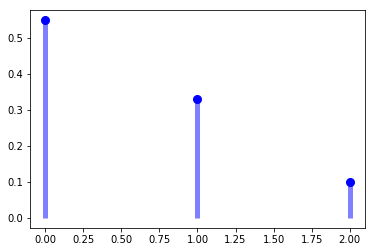

In [5]:
# setup experiment
mu = Lambda = 0.6
k = x = np.arange(poisson.ppf(0.01, Lambda), poisson.ppf(0.99, Lambda))
y = poisson.pmf(x, Lambda)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)

# Continuous

In [6]:
from scipy.stats import norm, laplace, gamma, pareto, beta, expon, erlang, chi2

## Normal

- **Probability density function**
$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

- **Likelihood**
$$L(\mu, \sigma^2) = \prod_{i=1}^n f(x_i | \mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} = (2\pi\sigma^2)^{-n/2} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2}$$

- **Log-likelihood**
$$ln L(\mu, \sigma^2) = \sum_{i=1}^n ln f(x_i | \mu, \sigma^2) = -\frac{n}{2} ln(2\pi) - \frac{n}{2} ln \sigma^2 - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2$$

- **MLE**: Taking derivatives with respect to $\mu$ and $\sigma^2$.
$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i$$
$$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2$$

- **Prior**
$$p(y)$$

- **Posterior**
$$p(y|x) = \frac{p(x|y) p(y)}{p(x)}$$
- **Posterior predictive distribution**
- https://en.wikipedia.org/wiki/Conjugate_prior

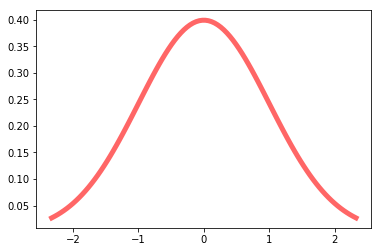

In [7]:
# setup experiment
mu = 0
std = 1
x = np.linspace(norm.ppf(0.01, mu, std), norm.ppf(0.99, mu, std), 100)
y = norm.pdf(x, mu, std)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

## Laplace

Heavy tails, also known as the double sided exponential distribution, $\mu$ is location, $b$ is scala.

- **PDF**
$$Lap(x|\mu, b) = \frac{1}{2b}e^{-\frac{|x - \mu|}{b}}$$
$$mean = \mu, mode = \mu, var = 2b^2$$

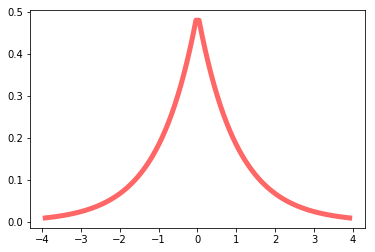

In [8]:
# setup experiment
mu = 0
std = 1
x = np.linspace(laplace.ppf(0.01, mu, std), laplace.ppf(0.99, mu, std), 100)
y = laplace.pdf(x, mu, std)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='laplace pdf')

## Gamma

Flexible distribution for positive real valued rv’s.

- **PDF**
$$Ga(T|shape = a, rate = b) = \frac{b^a}{\Gamma(a)}T^{a - 1}e^{-Tb}$$
$$\Gamma(x) = \int_0^\infty u^{x - 1}e^{-u}du$$
$$mean = \frac{a}{b}, mode = \frac{a - 1}{b}, var = \frac{a}{b^2}$$

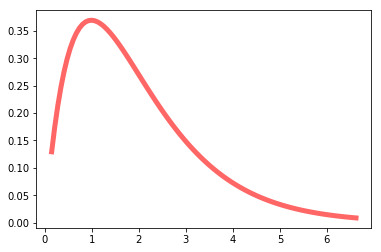

In [9]:
# setup experiment
a = 1.99
b = 1
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
y = gamma.pdf(x, a)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='gamma pdf')

- **Exponential**
$$Expon(x|\lambda) = Ga(x|1, \lambda)$$

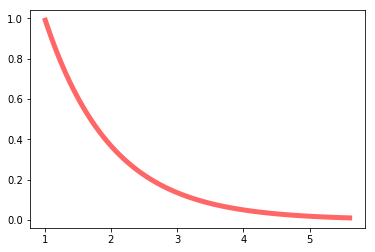

In [10]:
# setup experiment exponential
a = 1
x = np.linspace(expon.ppf(0.01, a), expon.ppf(0.99, a), 100)
y = expon.pdf(x, a)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='exponential pdf')

- **Erlang**
$$Erlang(x|\lambda) = Ga(x|2, \lambda)$$

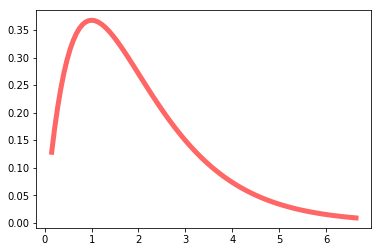

In [11]:
# setup experiment exponential
a = 2
x = np.linspace(erlang.ppf(0.01, a), erlang.ppf(0.99, a), 100)
y = erlang.pdf(x, a)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='erlang pdf')

- **Chi-square**
$$\chi^2(x|\nu) = Ga(x|\frac{\nu}{2}, \frac{1}{2})$$

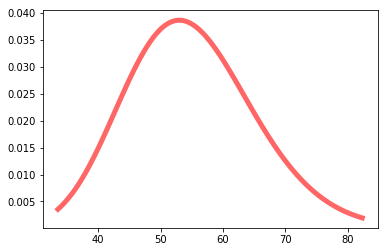

In [12]:
# setup experiment exponential
nu = 55
x = np.linspace(chi2.ppf(0.01, nu), chi2.ppf(0.99, nu), 100)
y = chi2.pdf(x, nu)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='Chi-square pdf')

## Beta

$$Beta(x|a, b) = \frac{1}{B(a, b)} x^{a - 1}(1 - x)^{b - 1}$$
$$B(a, b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)}$$
$$\Gamma(a) = (a - 1)!$$
$$mean = \frac{a}{a + b}, mode = \frac{a - 1}{a + b - 2}, var = \frac{ab}{(a + b)^2(a + b + 1)}$$

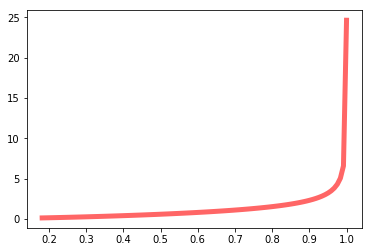

In [13]:
# setup experiment
a, b = 2.31, 0.627
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
y = beta.pdf(x, a, b)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='beta pdf')

## Pareto

Exhibit long tails, also called heavy tails, known as Zipf’s law or power law.

$$Pareto(x|k, m) = km^kx^{-(k + 1)}\mathbf{I} (x \ge m)$$
$$mean = \frac{km}{k - 1} \ if \ k > 1, mode = m, var = \frac{m^2k}{(k - 1)^2(k - 2)} \ if \ k > 2$$

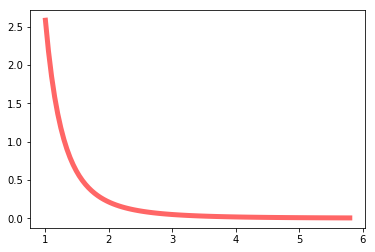

In [14]:
# setup experiment
b = 2.62
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(0.99, b), 100)
y = pareto.pdf(x, b)

# plotting result
fig, ax = plt.subplots(1, 1)
ax.plot(x, pareto.pdf(x, b), 'r-', lw=5, alpha=0.6, label='pareto pdf')